In [4]:
#importing necessary libraries

#for computation
import pandas as pd
import numpy as np
import math

#for visualisation
import matplotlib.pyplot as plt

#for scaling,metrics and tensorflow
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

#for building LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM

In [5]:
df=pd.read_csv("Microsoft_Stock.csv")

In [6]:
df.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [7]:
#choosing the required feature
closed_price=df['Close']
closed_price.head()

0    40.72
1    40.29
2    41.55
3    41.53
4    41.42
Name: Close, dtype: float64

In [8]:
#Scaling the data using MinMax Scaler
sc=MinMaxScaler()
closed_price=sc.fit_transform(np.array(closed_price).reshape(-1,1)).squeeze()

In [9]:
#splitting the data
train_size=int(len(closed_price)*0.8)
test_size=len(closed_price)-train_size

train,test=closed_price[0:train_size],closed_price[train_size:len(closed_price)]

In [10]:
#converting to array
def create(dataset,seq_len):
    x,y=[],[]
    for i in range(len(dataset)-seq_len-1):
        x.append(dataset[i:i+seq_len])
        y.append(dataset[i+seq_len])
    return np.array(x),np.array(y)

seq_len=10
xtrain,ytrain=create(train,seq_len)
xtest,ytest=create(test,seq_len)

In [11]:
#reshape input to be [samples,time,steps,features]
xtrain=np.reshape(xtrain,(xtrain.shape[0],1,xtrain.shape[1]))
xtest=np.reshape(xtest,(xtest.shape[0],1,xtest.shape[1]))

In [12]:
#building model
model=Sequential()
model.add(LSTM(4,input_shape=(1,seq_len)))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(xtrain,ytrain,epochs=100,batch_size=300,verbose=1)

Epoch 1/100
4/4 [==============================] - 2s 4ms/step - loss: 0.1278
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 0.1203
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 0.1133
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.1062
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.1000
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0941
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0861
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0805
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0761
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0722
Epoch 11/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0661
Epoch 12/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0620
Epoch 13/100
4/4 [==============================] - 0s 4ms/st

In [13]:
#prediction
trainpredict=model.predict(xtrain)
testpredict=model.predict(xtest)

10/10 [==============================] - 0s 1ms/step


In [14]:
trainpredict=sc.inverse_transform(trainpredict)
ytrain=sc.inverse_transform([ytrain])
testpredict=sc.inverse_transform(testpredict)
ytest=sc.inverse_transform([ytest])

In [15]:
#finding out RMSE value

trainscore=math.sqrt(mean_squared_error(ytrain[0],trainpredict[:,0]))
print("trainscore: %.2f "%(trainscore))
testscore=math.sqrt(mean_squared_error(ytest[0],testpredict[:,0]))
print("test score: %.2f "%(testscore))

trainscore: 8.68 
test score: 28.57 


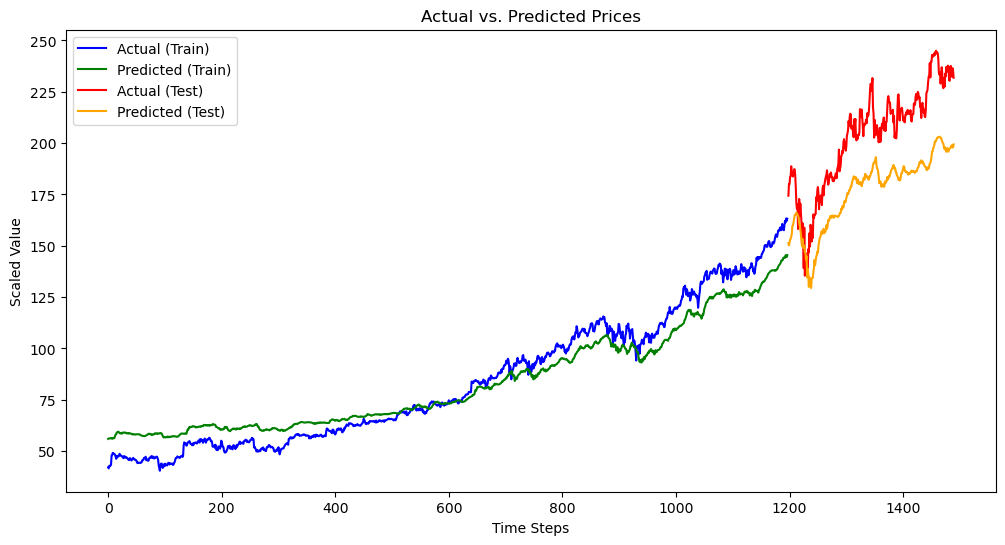

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(ytrain[0], label='Actual (Train)', color='blue')
plt.plot(trainpredict[:, 0], label='Predicted (Train)', color='green')
plt.plot(len(ytrain[0]) + np.arange(1, len(ytest[0]) + 1), ytest[0], label='Actual (Test)', color='red')
plt.plot(len(ytrain[0]) + np.arange(1, len(ytest[0]) + 1), testpredict[:, 0], label='Predicted (Test)', color='orange')
plt.xlabel('Time Steps')
plt.ylabel('Scaled Value')
plt.legend()
plt.title('Actual vs. Predicted Prices')
plt.show()